In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import tensorflow as tf

In [6]:
from tensorflow.keras.datasets import cifar100

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
(x_train, y_train), (x_test,y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 66s 0us/step


In [29]:
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [38]:
x_train1 = x_train[:1000]
y_train1 = y_train[:1000]
x_test1 = x_test[:1000]
y_test1 = y_test[:1000]

In [39]:
x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [40]:
np.unique(y_train1) # 100개

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [41]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train1)
y_test_oh = to_categorical(y_test1)

In [42]:
x_train.shape

(50000, 32, 32, 3)

In [43]:
model = Sequential()
model.add(Conv2D(128, input_shape=(32,32,3),padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(500,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 64)          0         
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)         

In [44]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [45]:
hist= model.fit(x_train1,y_train_oh,epochs=100, batch_size=10, validation_split= 0.2)

Epoch 1/100
80/80 [==============================] - 2s 21ms/step - loss: 5.5002 - accuracy: 0.0088 - val_loss: 4.5933 - val_accuracy: 0.0100
Epoch 2/100
80/80 [==============================] - 1s 18ms/step - loss: 4.5371 - accuracy: 0.0250 - val_loss: 4.5694 - val_accuracy: 0.0150
Epoch 3/100
80/80 [==============================] - 2s 27ms/step - loss: 4.5348 - accuracy: 0.0225 - val_loss: 4.5256 - val_accuracy: 0.0200
Epoch 4/100
80/80 [==============================] - 2s 26ms/step - loss: 4.5196 - accuracy: 0.0262 - val_loss: 4.5915 - val_accuracy: 0.0250
Epoch 5/100
80/80 [==============================] - 2s 24ms/step - loss: 4.4979 - accuracy: 0.0162 - val_loss: 4.5862 - val_accuracy: 0.0150
Epoch 6/100
80/80 [==============================] - 2s 26ms/step - loss: 4.4421 - accuracy: 0.0375 - val_loss: 4.5656 - val_accuracy: 0.0100
Epoch 7/100
80/80 [==============================] - 2s 28ms/step - loss: 4.3854 - accuracy: 0.0325 - val_loss: 4.5811 - val_accuracy: 0.0300
Epoch 

80/80 [==============================] - 2s 27ms/step - loss: 1.3193 - accuracy: 0.6650 - val_loss: 10.5694 - val_accuracy: 0.0450
Epoch 59/100
80/80 [==============================] - 2s 26ms/step - loss: 1.4757 - accuracy: 0.6400 - val_loss: 10.4930 - val_accuracy: 0.0350
Epoch 60/100
80/80 [==============================] - 2s 25ms/step - loss: 1.3236 - accuracy: 0.6662 - val_loss: 10.9294 - val_accuracy: 0.0400
Epoch 61/100
80/80 [==============================] - 2s 30ms/step - loss: 1.4092 - accuracy: 0.6662 - val_loss: 9.9042 - val_accuracy: 0.0500
Epoch 62/100
80/80 [==============================] - 2s 27ms/step - loss: 1.4023 - accuracy: 0.6513 - val_loss: 11.2369 - val_accuracy: 0.0600
Epoch 63/100
80/80 [==============================] - 2s 26ms/step - loss: 1.3936 - accuracy: 0.6775 - val_loss: 11.2454 - val_accuracy: 0.0550
Epoch 64/100
80/80 [==============================] - 2s 29ms/step - loss: 1.3208 - accuracy: 0.6562 - val_loss: 11.0218 - val_accuracy: 0.0350
Epoch 

In [48]:
model.evaluate(x_test1,y_test_oh)

32/32 [==============================] - 1s 12ms/step - loss: 14.0865 - accuracy: 0.0410


[14.086515426635742, 0.04100000113248825]

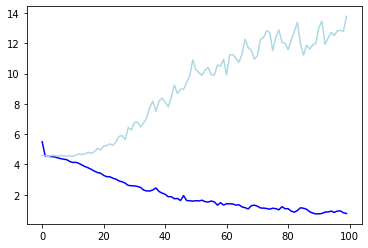

In [46]:
plt.plot(hist.history['loss'],color='b')
plt.plot(hist.history['val_loss'],color= 'lightblue')